# Surface Recombination Velocity Modelling - Finite Element Method from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(["seaborn", "seaborn-poster"])

In [2]:
nx = 41
dx = 2 / (nx - 1)
nt = 20    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
sigma = .2 
dt = sigma * dx**2 / nu #dt is defined using sigma ... more later!


u = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

un = np.ones(nx) #our placeholder array, un, to advance the solution in time

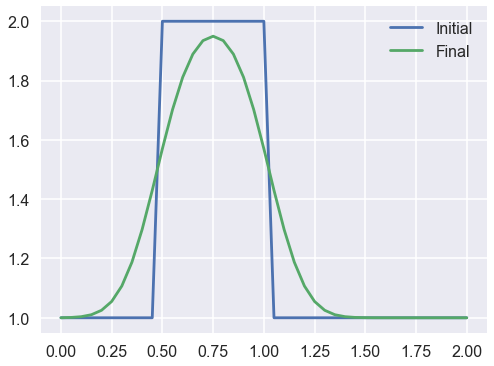

In [3]:
plt.figure(figsize=(8,6))
plt.plot(np.linspace(0, 2, nx), u, label="Initial");

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    u[1:-1] = un[1:-1] + nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2])
        
plt.plot(np.linspace(0, 2, nx), u, label="Final");
plt.legend();

### Continuity Equation
---

$$ \frac{\delta n(x,t)}{\delta t} = D\frac{\delta ^2 n(x,t)}{\delta x^2} -\frac{n(x,t)}{\tau {_b}} $$


### Boundary conditions
---

$$ \frac{\delta n}{\delta x} | {_{x=0}} = \frac{SRV_1}{D}n(0) $$


$$ \frac{\delta n}{\delta x} | {_{x=X}} = -\frac{SRV_2}{D}n(X) $$

## Taylor Expansion
---

- Forward difference in space (x)

$$ N_{i+1} = N_i + \Delta x \frac{\delta N}{\delta x} + \frac{\Delta x^2}{2} \frac{\delta ^2 N}{\delta x^2} + Third Order + Fourth Order + ... $$

- Backward difference in space (x)

$$ N_{i-1} = N_i - \Delta x \frac{\delta N}{\delta x} + \frac{\Delta x^2}{2} \frac{\delta ^2 N}{\delta x^2} - Third Order + Fourth Order - ... $$

### For first derivative 


$$ \frac{N_{i+1} - N_i}{\Delta x} = \frac{\delta N}{\delta x} $$

### Add forward and backward difference in space for second derivative


$$ \frac{N_{i+1} - 2N_i + N_{i-1}}{\Delta x^2} =  \frac{\delta ^2 N}{\delta x^2} $$

### Using the forward difference in time (t)

---

$$ n^{t+1}_i =  n^{t}_i + D \frac{\Delta t}{\Delta x^2} (n_{i+1}^t - 2n_i^t + n_{i-1}^t) - \frac{n_i^t \Delta t}{\tau _b} $$

### Boundary conditions
---

$$ n_{0}^{t+1} = n_1^{t+1} - \Delta x \frac{SRV_1}{D}n_0^{t} $$

$$ n_{X}^{t+1} = n_{X-1}^{t+1} - \Delta x \frac{SRV_1}{D}n_X^{t} $$

In [20]:
nx = 501
dx = 2 / (nx - 1)

nt = 100_000 # the number of timesteps we want to calculate (in ns)

D = 0.9 * (1e14/1e9)  # Diffusivity in cm2/s converted to nm2/ns

sigma = .5
dt = sigma * dx**2 / D # dt is defined using sigma

S1 = 1e6 * (1e7/1e9) # SRV1 in cm/s converted to nm/ns
S2 = 1e6 * (1e7/1e9) # SRV2 in cm/s converted to nm/ns

tau_b = 8_000 # bulk lifetime in nano-seconds


"""Initial Condition"""
x_ = np.linspace(0, 501, nx)
N = (1e15) * np.exp(-x_ / 250) * ((1/1e7)**3) # in carriers/cm3 converted to carrierss/nm3

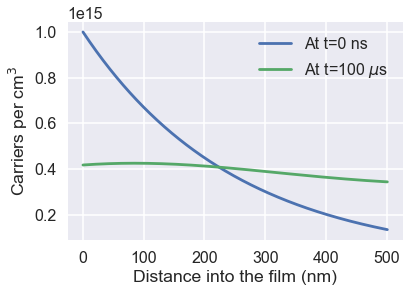

In [21]:
plt.figure(figsize=(6,4))
plt.plot(x_, N/((1/1e7)**3), label="At t=0 ns")

for t in range(nt):
    un = N.copy() # copy the existing values of N into un
    N[1:-1] = un[1:-1] + D * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]) - ((un[1:-1] * dt) / tau_b)
    # Boundary conditions
    N[0] = N[1] - dx * ((S1 / D) * un[0])
    N[-1] = N[-2] - dx * ((S2 / D) * un[-1])
    
plt.plot(x_, N/((1/1e7)**3), label=f"At t={int(nt/1e3)} $\mu$s")
plt.xlabel("Distance into the film (nm)"); plt.ylabel("Carriers per cm$^{3}$")
plt.legend();

In [11]:
initial_N = N.copy()

In [13]:
N_1e6 = N.copy()

In [16]:
N_1e2 = N.copy()

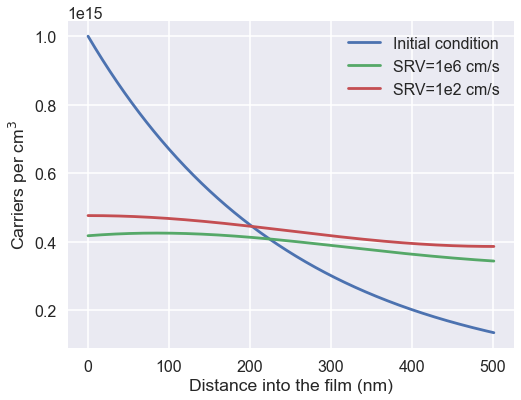

In [23]:
plt.figure(figsize=(8,6))
plt.plot(x_, initial_N/((1/1e7)**3))
plt.plot(x_, N_1e6/((1/1e7)**3))
plt.plot(x_, N_1e2/((1/1e7)**3))
plt.legend(["Initial condition", "SRV=1e6 cm/s", "SRV=1e2 cm/s"]);
plt.xlabel("Distance into the film (nm)"); plt.ylabel("Carriers per cm$^{3}$");